In [78]:
# importing re3levant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [79]:
# Load dataset
df = pd.read_csv(r"C:\Users\abirsinha\Desktop\UpGrad\Assignments\Lead Scoring Assignment\Leads.csv")

# Data Understanding

In [80]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [81]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [82]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [83]:
# Check for missing values in percentages
missing_values = (df.isnull().sum() / len(df)) * 100
print("Missing Values Percentage:")
print(missing_values[missing_values > 0])

Missing Values Percentage:
Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score   

##### Observations:
	1. No duplicate rows in the dataset.
	2. Columns with significant missing values (>20%):
		• Lead Quality (51.6%)
		• Asymmetrique related columns (45.6%)
		• Tags (36.3%)
		• Country (26.6%)
		• How did you hear about X Education (23.9%)
		• What is your current occupation (29.1%)
		• What matters most to you in choosing a course (29.3%)
		• Lead Profile (29.3%)

# Handle Missing Values

In [84]:
# Drop unnecessary identifier columns
df.drop(columns=["Lead Number", "Prospect ID"], axis=1, inplace=True)

In [85]:
# Drop highly missing columns
drop_columns = ["Lead Quality", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score"]
df.drop(columns=drop_columns, inplace=True)

In [86]:
# Fill missing categorical values with 'Unknown'
categorical_missing_cols = ["Country", "How did you hear about X Education", "What is your current occupation", "What matters most to you in choosing a course", "Tags", "Lead Profile"]
df[categorical_missing_cols] = df[categorical_missing_cols].fillna("Unknown")

#### Why Mode or ‘Unknown’?
	• Categorical variables do not have a numerical central tendency, so using mean/median is meaningless.
	• Using the most frequent category (mode) ensures minimal distortion for key categorical features.
	• For some features, ‘Unknown’ helps retain neutrality without introducing bias.
	• Dropping Rows: Not ideal as it leads to data loss.
	• Replacing with Mode (Most Frequent Value): Used in cases where missing values were relatively low.


In [87]:
# Fill missing numerical values with median
df.loc[:, "TotalVisits"] = df["TotalVisits"].fillna(df["TotalVisits"].median())
df.loc[:, "Page Views Per Visit"] = df["Page Views Per Visit"].fillna(df["Page Views Per Visit"].median())

#### Columns:
	• TotalVisits
	• Page Views Per Visit

#### Why Median?
	• These columns contain outliers (observed in the box plots of my rough work).
	• The mean is sensitive to outliers, which could distort the data. Not used due to skewed distributions.
	• The median is robust and represents the central tendency without being affected by extreme values.
	• Mode: Not used since numerical data does not typically have repeating values.

# Exploratory Data Analysis

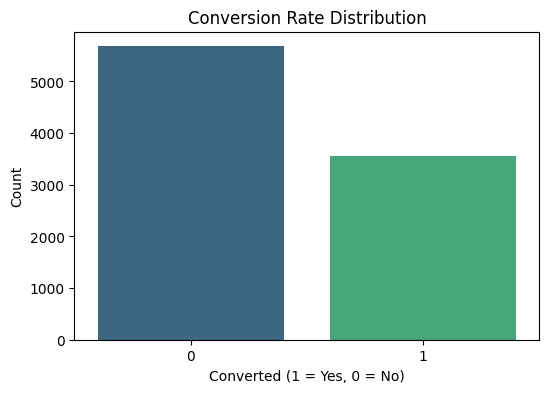

In [88]:
# Univariate Analysis
plt.figure(figsize=(6,4))
sns.countplot(x=df["Converted"], hue=df["Converted"], palette="viridis", legend=False)
plt.title("Conversion Rate Distribution")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

#### Conversion Rate Imbalance:
    • Around 38.5% of leads converted (Converted = 1).
    • This indicates a moderate class imbalance that we might need to address when training the model.

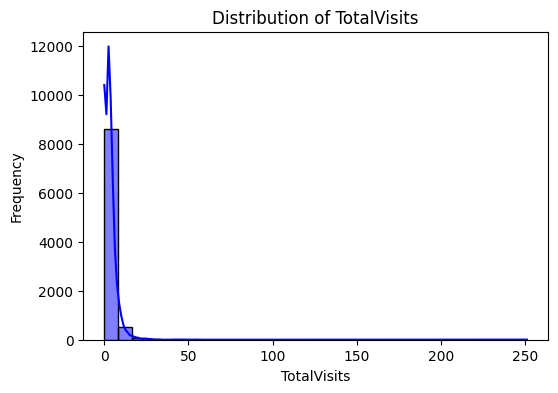

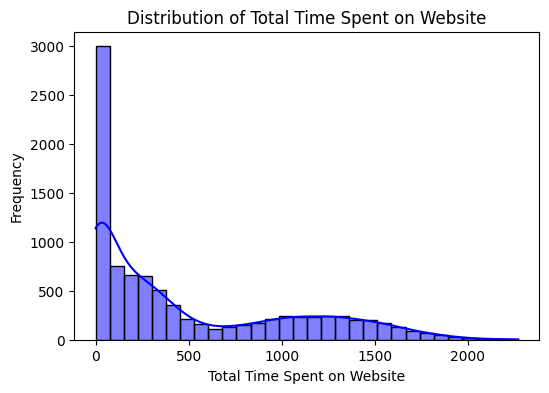

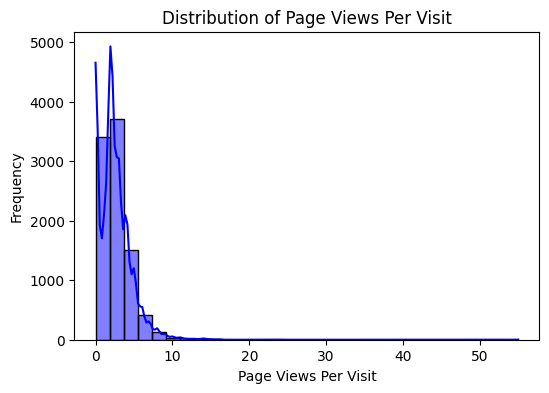

In [89]:
# Histogram to visualize distribution of numerical features
numerical_features = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
for feature in numerical_features:
   plt.figure(figsize=(6, 4))
   sns.histplot(df[feature], bins=30, kde=True, color="blue")  # Histogram with KDE
   plt.title(f"Distribution of {feature}")
   plt.xlabel(feature)
   plt.ylabel("Frequency")
   plt.show()

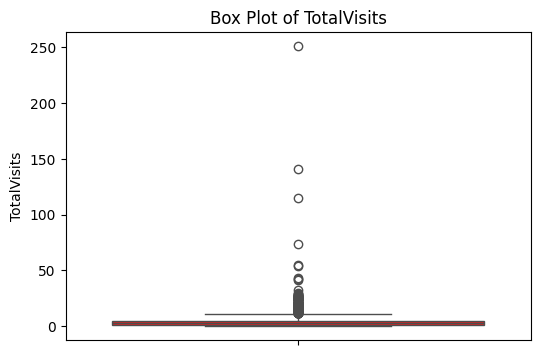

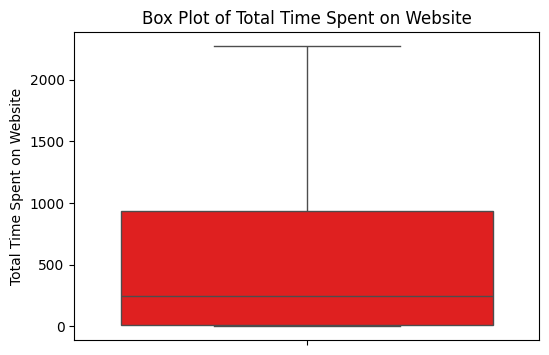

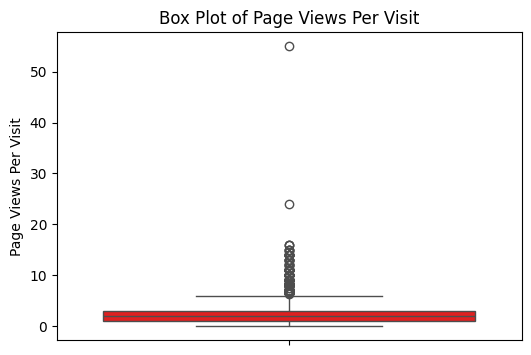

In [90]:
# Box plots to check for outliers in numerical features
for feature in numerical_features:
   plt.figure(figsize=(6, 4))
   sns.boxplot(y=df[feature], color="red")  # Box plot for outliers detection
   plt.title(f"Box Plot of {feature}")
   plt.ylabel(feature)
   plt.show()

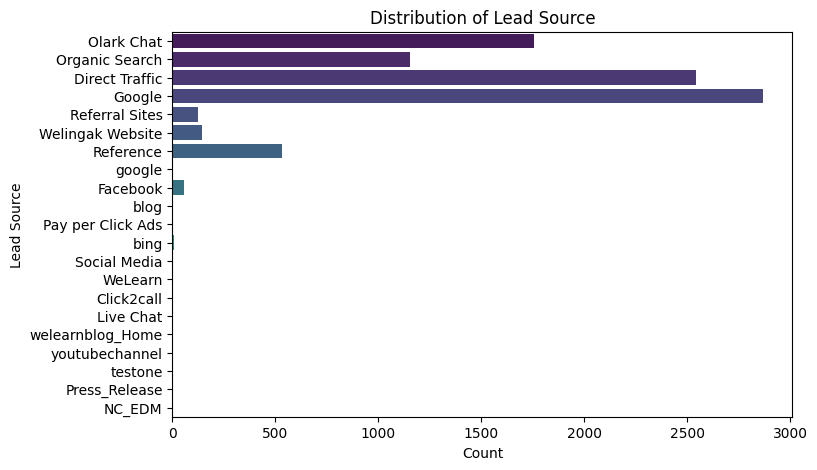

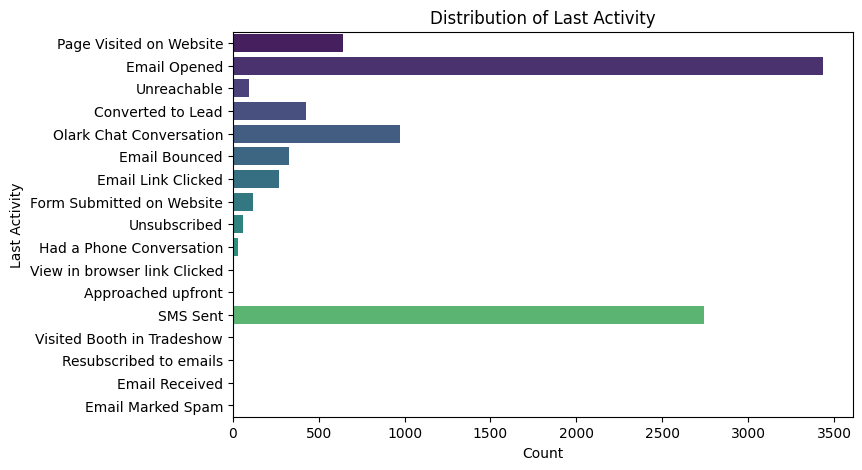

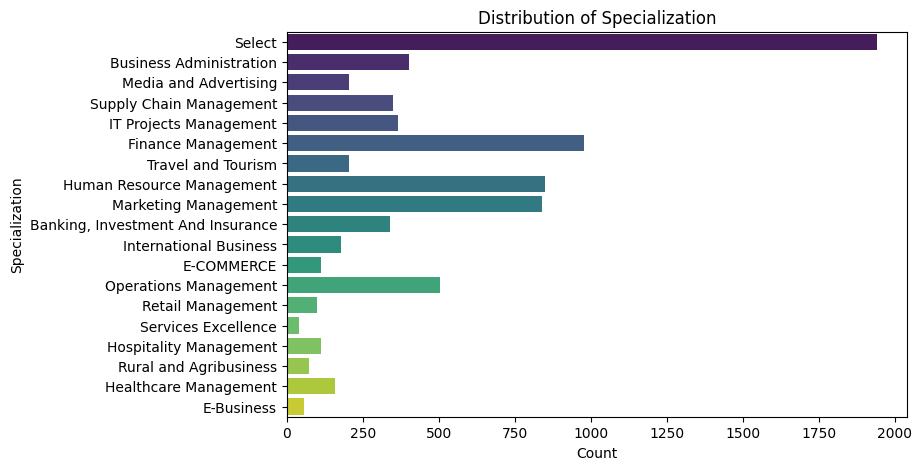

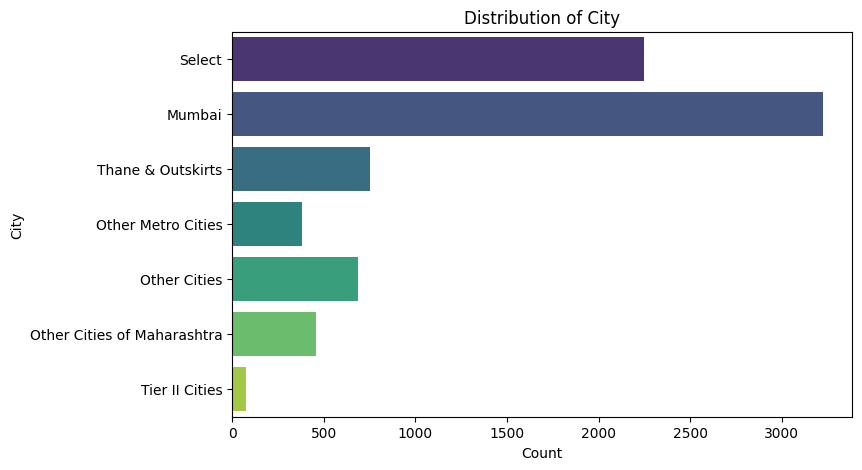

In [91]:
# Count plots for categorical features with significant impact
categorical_features = ["Lead Source", "Last Activity", "Specialization", "City"]
for feature in categorical_features:
   plt.figure(figsize=(8, 5))
   sns.countplot(y=df[feature], hue=df[feature], palette="viridis", legend=False)  # Count plot
   plt.title(f"Distribution of {feature}")
   plt.xlabel("Count")
   plt.ylabel(feature)
   plt.show()

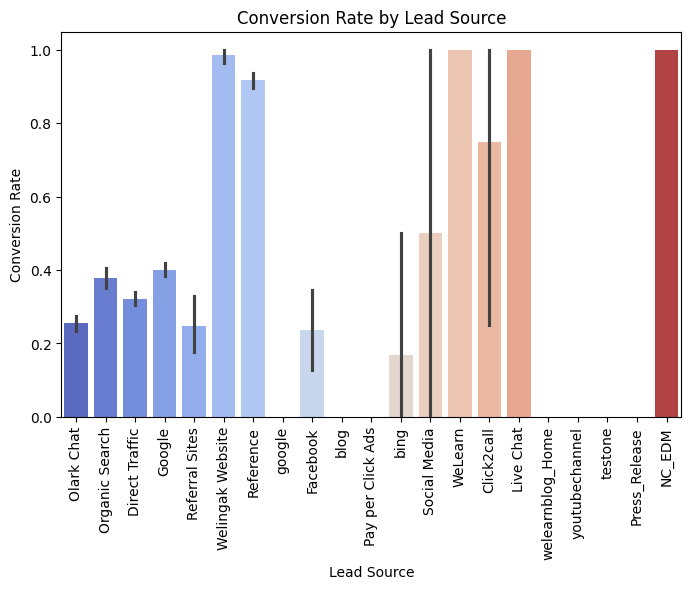

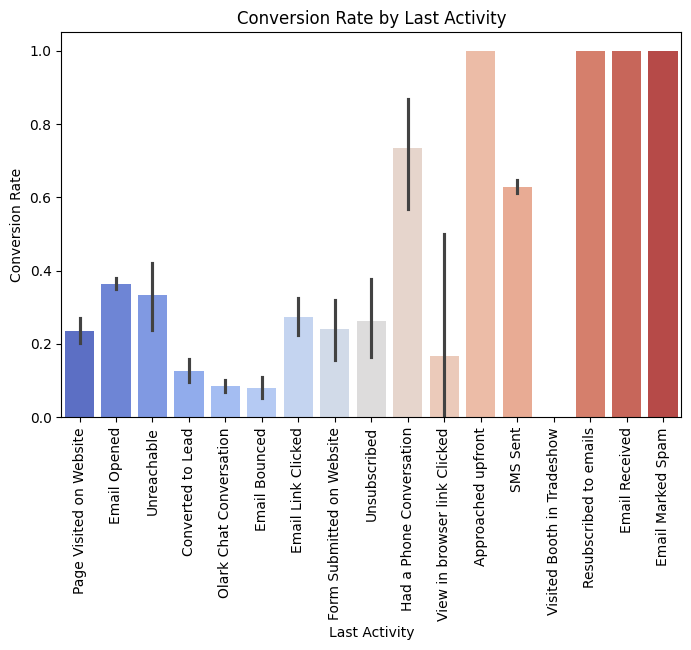

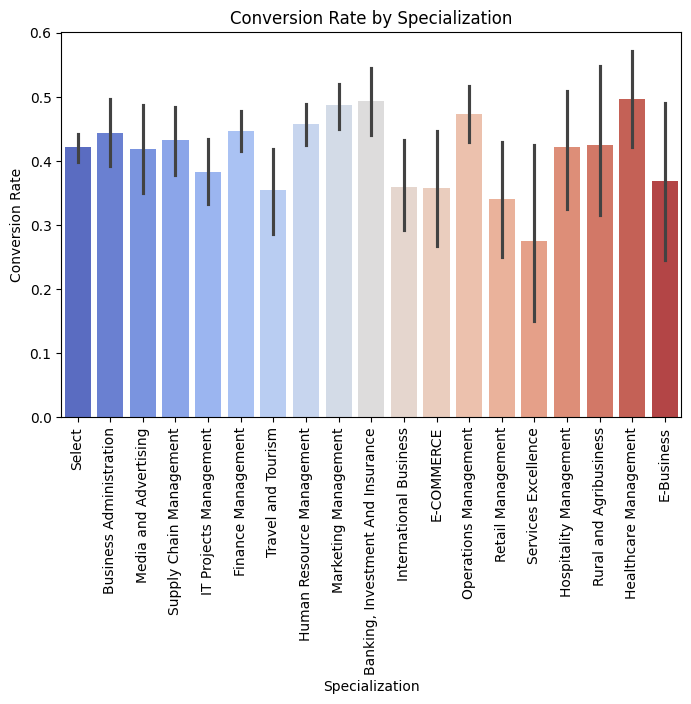

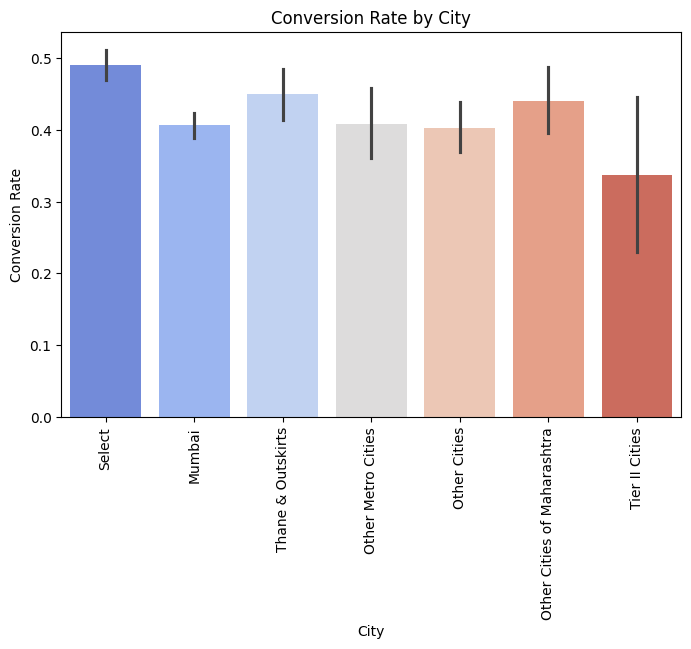

In [92]:
# Checking conversion rate by categorical features
for feature in categorical_features:
   plt.figure(figsize=(8, 5))
   sns.barplot(x=df[feature], y=df["Converted"], hue=df[feature], palette="coolwarm", legend=False)  # Bar plot for conversion rates
   plt.xticks(rotation=90)
   plt.title(f"Conversion Rate by {feature}")
   plt.xlabel(feature)
   plt.ylabel("Conversion Rate")
   plt.show()

### Insights from the Visualizations:

##### 1. Numerical Features (Histograms & Box Plots)
	• Total Visits is highly skewed, with a majority of users having very few visits.
	• Total Time Spent on Website shows bimodal behavior, indicating distinct user groups.
	• Page Views Per Visit is right-skewed, with a few users having exceptionally high values.
	• Box plots reveal that all three numerical features have outliers, especially in Total Visits.

##### 2. Categorical Features (Bar Charts & Conversion Rate)
	• Lead Source:
		- Google, Direct Traffic, and Olark Chat contribute the highest number of leads.
		- Reference & Click2Call show the highest conversion rates.
	• Last Activity:
		- Email Opened and SMS Sent dominate activity types.
		- High-converting activities include SMS Sent and Direct Conversations.
	• Specialization:
		- Finance, HR, and Marketing Management have the highest leads.
		- Most specializations have conversion rates around 40-50%.
	• City:
		- Mumbai and “Select” category have the highest number of leads.
		- Conversion rates are fairly even across cities, with Tier II Cities showing a lower rate.

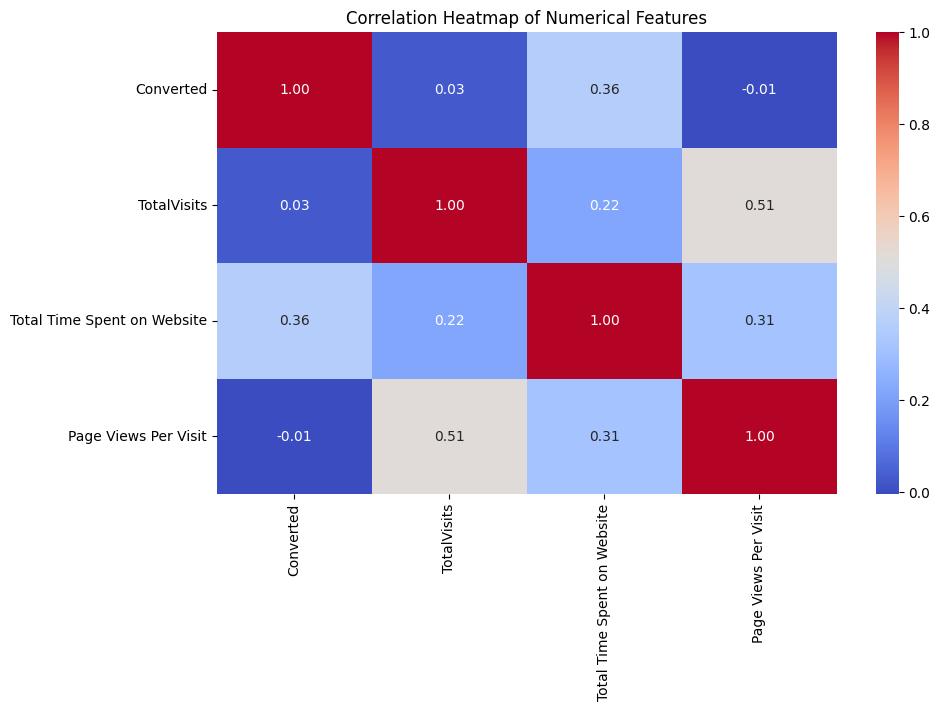

In [93]:
# Multivariate Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### Correlation Analysis:
    • Total Time Spent on Website has a moderate positive correlation (0.36) with conversion.
    • Other numerical features (Total Visits, Page Views Per Visit) have weak correlations with conversion.
    • Lead Number is just an identifier and has no predictive value.

In [94]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
   le = LabelEncoder()
   df[col] = le.fit_transform(df[col])
   label_encoders[col] = le

In [95]:
# Scale numerical features
numerical_cols = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Model building

In [96]:
# Split data into training and test sets
X = df.drop(columns=["Converted"])
y = df["Converted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
# Standardize Data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Model Training

In [98]:
# Train logistic regression model
model = LogisticRegression(random_state=42, max_iter=5000, solver='saga')
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='saga')

### Model Evaluation

In [99]:
# Predict on test data
y_pred = model.predict(X_test)

In [100]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [101]:
print("Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Performance:
Accuracy: 0.7906
Precision: 0.7504
Recall: 0.6840
F1 Score: 0.7157
Confusion Matrix:
[[974 162]
 [225 487]]


In [102]:
# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=5000), n_features_to_select=15)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]

In [103]:
print("Selected Features:", selected_features)

Selected Features: Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [104]:
# Train final model with selected features
X_train_selected = X_train.loc[:, selected_features]
X_test_selected = X_test.loc[:, selected_features]

In [105]:
final_model = LogisticRegression(solver='saga', random_state=42, max_iter=5000)
final_model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=5000, random_state=42, solver='saga')

In [106]:
y_pred_final = final_model.predict(X_test_selected)

In [107]:
# Final Model Evaluation
accuracy_final = accuracy_score(y_test, y_pred_final)
precision_final = precision_score(y_test, y_pred_final)
recall_final = recall_score(y_test, y_pred_final)
f1_final = f1_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

In [108]:
print("Final Model Performance:")
print(f"Accuracy: {accuracy_final:.4f}")
print(f"Precision: {precision_final:.4f}")
print(f"Recall: {recall_final:.4f}")
print(f"F1 Score: {f1_final:.4f}")
print("Final Confusion Matrix:")
print(conf_matrix_final)

Final Model Performance:
Accuracy: 0.7906
Precision: 0.7512
Recall: 0.6826
F1 Score: 0.7152
Final Confusion Matrix:
[[975 161]
 [226 486]]


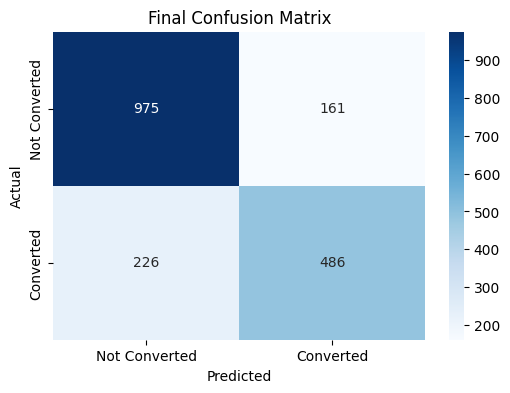

In [109]:
# Visualize final confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Final Confusion Matrix")
plt.show()

#### Queries from the DOC file:
	1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?
	2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?
	3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.
	4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [ ]:
# Identify Top 3 Features Contributing to Lead Conversion
feature_importance = pd.Series(model.coef_[0], index=X_train.columns).sort_values(ascending=False)
top_3_features = feature_importance[:3]
print("Top 3 Variables Contributing to Conversion:")
print(top_3_features)

In [ ]:
# Identify Top 3 Categorical Variables to Focus On
categorical_importance = feature_importance.loc[categorical_cols].sort_values(ascending=False)[:3]
print("Top 3 Categorical Variables to Focus on:")
print(categorical_importance)

In [ ]:
# Strategy for Intern Hiring Period
high_conversion_leads = X_test[y_pred == 1]
high_conversion_leads_sorted = high_conversion_leads.sort_values(by=["Total Time Spent on Website", "Lead Source", "Last Activity"], ascending=False)
print("Strategy: Prioritize calling leads with highest time spent on website and strong engagement metrics.")

In [ ]:
# Strategy for Minimizing Calls when Targets are Achieved
top_confidence_leads = X_test[(model.predict_proba(X_test)[:, 1] > 0.85)]
print("Strategy: Only call leads with conversion probability >85% and automate communication for lower-priority leads.")